In [1]:
# -*- coding: utf-8 -*-

#Imports
import pandas as pd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
#Cargamos fichero datos_filtrados.csv
df_datos_filtrados = pd.read_csv('../TFM/csv_bigdata/datos_filtrados.csv', sep=';')
df_datos_filtrados.head(10)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994
5,2015-01-01,Jueves,00:15:01,A13,ALBORAIA,40,-0.368968,39.485116
6,2015-01-01,Jueves,00:15:01,A130,HERNAN CORTES,55,-0.371882,39.469184
7,2015-01-01,Jueves,00:15:01,A131,ISABEL DE VILLENA,16,-0.325794,39.479083
8,2015-01-01,Jueves,00:15:01,A132,ISABEL LA CATOLICA,18,-0.371171,39.469726
9,2015-01-01,Jueves,00:15:01,A133,ISLAS CANARIAS,49,-0.335863,39.461000


In [3]:
df_datos_filtrados.dtypes

fecha          object
dia_semana     object
hora           object
id_tramo       object
des_tramo      object
estado          int64
longitud      float64
latitud       float64
dtype: object

In [4]:
df_datos_filtrados.count()

fecha         11817827
dia_semana    11817827
hora          11817827
id_tramo      11817827
des_tramo     11817827
estado        11817827
longitud      11817827
latitud       11817827
dtype: int64

### Enero 2015

In [5]:
#Filtramos por Enero 2015
df_enero = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-01-01')& \
                              (df_datos_filtrados['fecha'] <= '2015-01-31')]\
                              .groupby(df_datos_filtrados['fecha'])\
                              .estado.mean().to_frame().reset_index()

#Añadimos valor faltante con el valor de la media de la columna estado en Enero de 2015
row_enero = {'fecha':'2015-01-10', 'estado': df_enero.estado.mean()}
df_enero = df_enero.append(row_enero, ignore_index=True)

df_enero.sort_values(by=['fecha'],inplace=True)

df_enero.set_index('fecha',inplace=True)
df_enero.reset_index()

,fecha,estado
0,2015-01-01,493.433296
1,2015-01-02,583.876004
2,2015-01-03,613.272727
3,2015-01-04,937.628987
4,2015-01-05,555.306586
5,2015-01-06,874.261390
6,2015-01-07,906.280544
7,2015-01-08,1341.575682
8,2015-01-09,762.667467
9,2015-01-10,795.008835


In [6]:
#Máximo Valor Estado Enero 2015
df_enero[df_enero.estado == df_enero.estado.max()].reset_index()

,fecha,estado
0,2015-01-08,1341.575682


In [7]:
#Mínimo Valor Estado Enero 2015
df_enero[df_enero.estado == df_enero.estado.min()].reset_index()

,fecha,estado
0,2015-01-01,493.433296


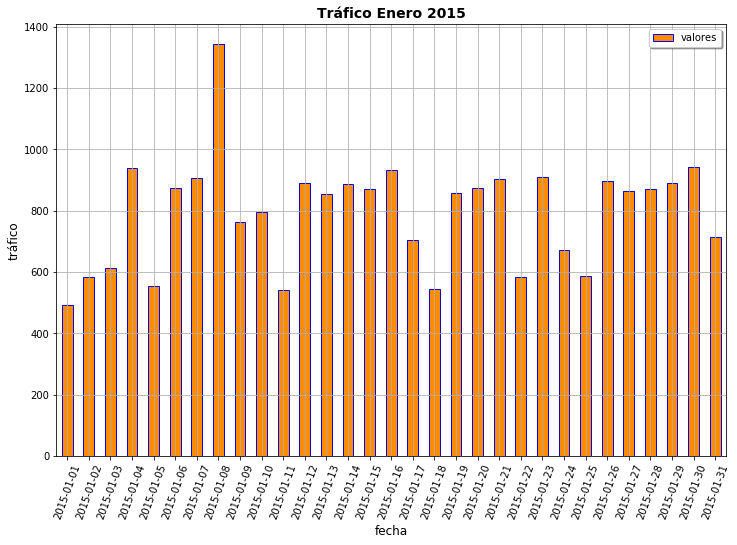

In [8]:
#Gráfica para mostrar el tráfico por días en Enero 2015
df_enero.plot(kind='bar',color='darkorange',edgecolor='blue',figsize=(12,6))
plt.title('Tráfico Enero 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Febrero 2015

In [9]:
#Filtramos por Febrero 2015
df_febrero = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-02-01')&\
                                (df_datos_filtrados['fecha'] <= '2015-02-29')]\
                                .groupby(df_datos_filtrados['fecha'])\
                                .estado.mean().to_frame().reset_index()


#Añadimos valor faltante con el valor de la media de la columna estado en Febrero de 2015
row_febrero = {'fecha':'2015-02-10', 'estado': df_febrero.estado.mean()}
df_febrero = df_febrero.append(row_febrero, ignore_index=True)

df_febrero.sort_values(by=['fecha'],inplace=True)

df_febrero.set_index('fecha',inplace=True)
df_febrero.reset_index().head(5)

,fecha,estado
0,2015-02-01,775.352368
1,2015-02-02,866.176572
2,2015-02-03,871.044889
3,2015-02-04,844.571518
4,2015-02-05,665.140298


In [10]:
#Máximo Valor Estado Febrero 2015
df_febrero[df_febrero.estado == df_febrero.estado.max()].reset_index()

,fecha,estado
0,2015-02-08,1341.575682


In [11]:
#Mínimo Valor Estado Febrero 2015
df_febrero[df_febrero.estado == df_febrero.estado.min()].reset_index()

,fecha,estado
0,2015-02-22,487.384402


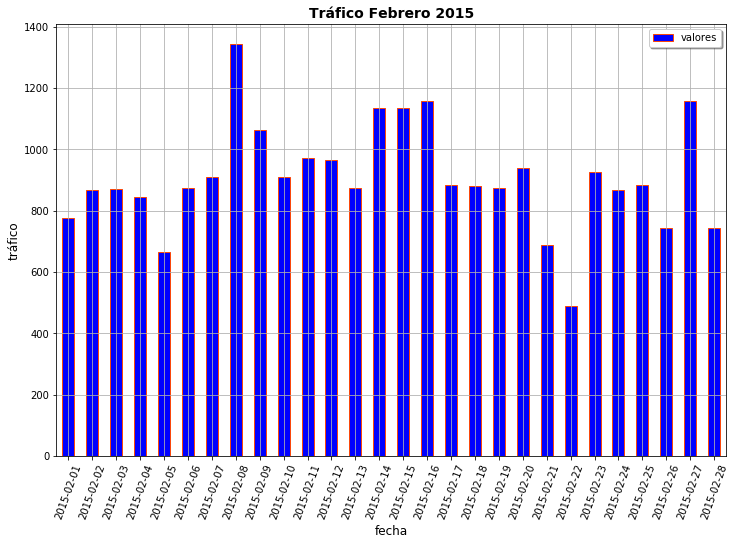

In [12]:
#Gráfica para mostrar el tráfico por días en cada mes
df_febrero.plot(kind='bar',color='blue',edgecolor='#f9480b',figsize=(12,6))
plt.title('Tráfico Febrero 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Marzo 2015

In [13]:
#Filtramos por Marzo 2015
df_marzo = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-03-01')&\
                              (df_datos_filtrados['fecha'] <= '2015-03-31')]\
                              .groupby(df_datos_filtrados['fecha'])\
                              .estado.mean().to_frame().reset_index()

#Añadimos valor faltante con el valor de la media de la columna estado en Marzo de 2015
row_marzo = {'fecha':'2015-03-10', 'estado': df_marzo.estado.mean()}
df_marzo = df_marzo.append(row_marzo, ignore_index=True)

df_marzo.sort_values(by=['fecha'],inplace=True)

df_marzo.set_index('fecha',inplace=True)
df_marzo.reset_index().head(5)

,fecha,estado
0,2015-03-01,683.931399
1,2015-03-02,876.307396
2,2015-03-03,872.529709
3,2015-03-04,491.837642
4,2015-03-05,639.449569


In [14]:
#Máximo Valor Estado Marzo 2015
df_marzo[df_marzo.estado == df_marzo.estado.max()].reset_index()

,fecha,estado
0,2015-03-12,1303.176215


In [15]:
#Mínimo Valor Estado Marzo 2015
df_marzo[df_marzo.estado == df_marzo.estado.min()].reset_index()

,fecha,estado
0,2015-03-09,266.850719


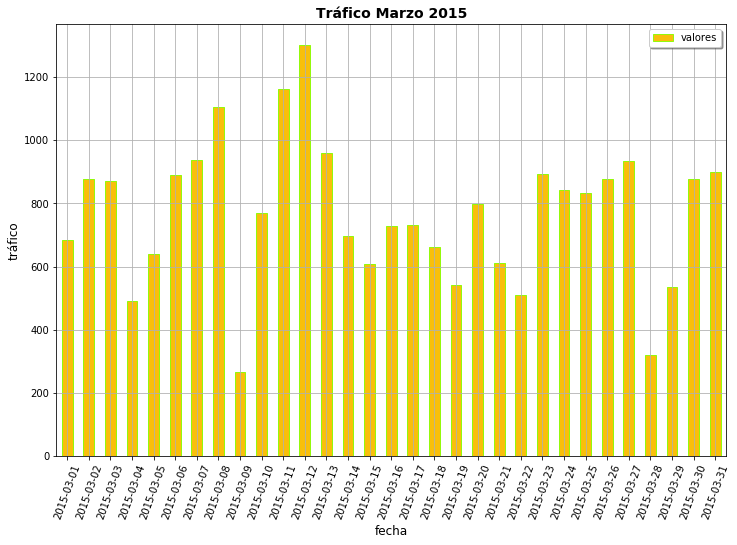

In [16]:
#Gráfica para mostrar el tráfico por días en Marzo
df_marzo.plot(kind='bar',color='#f9bf0b',edgecolor='#94f90b',figsize=(12,6))
plt.title('Tráfico Marzo 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Abril 2015

In [17]:
#Filtramos por Abril 2015
df_abril = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-04-01')&\
                              (df_datos_filtrados['fecha'] <= '2015-04-30')]\
                              .groupby(df_datos_filtrados['fecha'])\
                              .estado.mean().to_frame().reset_index()


#Añadimos valor faltante con el valor de la media de la columna estado en Abril de 2015
row_abril_1 = {'fecha':'2015-04-09', 'estado': df_abril.estado.mean()}
df_abril = df_abril.append(row_abril_1, ignore_index=True)

row_abril_2 = {'fecha':'2015-04-10', 'estado': df_abril.estado.mean()}
df_abril = df_abril.append(row_abril_2, ignore_index=True)

df_abril.sort_values(by=['fecha'],inplace=True)

df_abril.set_index('fecha',inplace=True)
df_abril.reset_index().head(5)

,fecha,estado
0,2015-04-01,435.276563
1,2015-04-02,907.835117
2,2015-04-03,884.480096
3,2015-04-04,526.943475
4,2015-04-05,876.453743


In [18]:
#Máximo Valor Estado Abril 2015
df_abril[df_abril.estado == df_abril.estado.max()].reset_index()

,fecha,estado
0,2015-04-21,1271.678716


In [19]:
#Mínimo Valor Estado Abril 2015
df_abril[df_abril.estado == df_abril.estado.min()].reset_index()

,fecha,estado
0,2015-04-01,435.276563


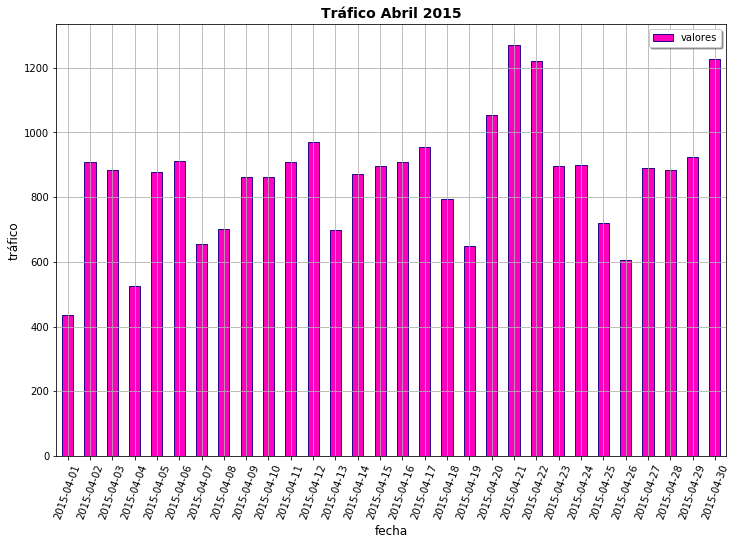

In [20]:
#Gráfica para mostrar el tráfico por días en Abril
df_abril.plot(kind='bar',color='#FF00BF',edgecolor='#29088A',figsize=(12,6))
plt.title('Tráfico Abril 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Mayo 2015

In [21]:
#Filtramos por Mayo 2015
df_mayo = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-05-01')&\
                             (df_datos_filtrados['fecha'] <= '2015-05-31')]\
                             .groupby(df_datos_filtrados['fecha'])\
                             .estado.mean().to_frame().reset_index()


#Añadimos valor faltante con el valor de la media de la columna estado en Mayo de 2015
row_mayo_1 = {'fecha':'2015-05-09', 'estado': df_mayo.estado.mean()}
df_mayo = df_mayo.append(row_mayo_1, ignore_index=True)

row_mayo_2 = {'fecha':'2015-05-10', 'estado': df_mayo.estado.mean()}
df_mayo = df_mayo.append(row_mayo_2, ignore_index=True)

df_mayo.sort_values(by=['fecha'],inplace=True)

df_mayo.set_index('fecha',inplace=True)
df_mayo.reset_index().head(5)

,fecha,estado
0,2015-05-01,814.566392
1,2015-05-02,961.691855
2,2015-05-03,914.218956
3,2015-05-04,480.466872
4,2015-05-05,878.942703


In [22]:
#Máximo Valor Estado Mayo 2015
df_mayo[df_mayo.estado == df_mayo.estado.max()].reset_index()

,fecha,estado
0,2015-05-18,1104.903301


In [23]:
#Mínimo Valor Estado Mayo 2015
df_mayo[df_mayo.estado == df_mayo.estado.min()].reset_index()

,fecha,estado
0,2015-05-04,480.466872


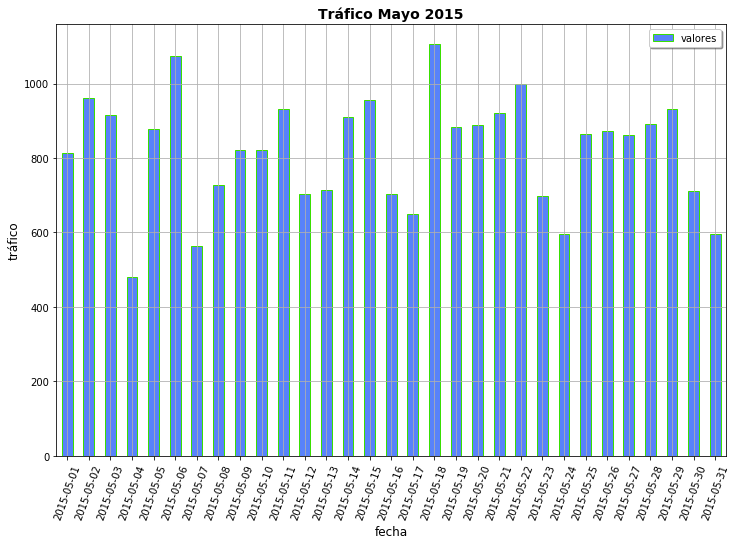

In [24]:
#Gráfica para mostrar el tráfico por días en Mayo
df_mayo.plot(kind='bar',color='#5882FA',edgecolor='#3ADF00',figsize=(12,6))
plt.title('Tráfico Mayo 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Junio 2015

In [25]:
#Filtramos por Junio 2015
df_junio = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-06-01')&\
                              (df_datos_filtrados['fecha'] <= '2015-06-30')]\
                              .groupby(df_datos_filtrados['fecha'])\
                              .estado.mean().to_frame().reset_index()

#Añadimos valor faltante con el valor de la media de la columna estado en Junio de 2015
row_junio_1 = {'fecha':'2015-06-09', 'estado': df_junio.estado.mean()}
df_junio = df_junio.append(row_junio_1, ignore_index=True)

row_junio_2 = {'fecha':'2015-06-10', 'estado': df_junio.estado.mean()}
df_junio = df_junio.append(row_junio_2, ignore_index=True)

df_junio.sort_values(by=['fecha'],inplace=True)

df_junio.set_index('fecha',inplace=True)
df_junio.reset_index().head(5)

,fecha,estado
0,2015-06-01,549.998896
1,2015-06-02,944.505391
2,2015-06-03,950.007947
3,2015-06-04,455.211904
4,2015-06-05,887.873746


In [26]:
#Máximo Valor Estado Junio 2015
df_junio[df_junio.estado == df_junio.estado.max()].reset_index()

,fecha,estado
0,2015-06-29,1122.377312


In [27]:
#Mínimo Valor Estado Junio 2015
df_junio[df_junio.estado == df_junio.estado.min()].reset_index()

,fecha,estado
0,2015-06-07,187.237769


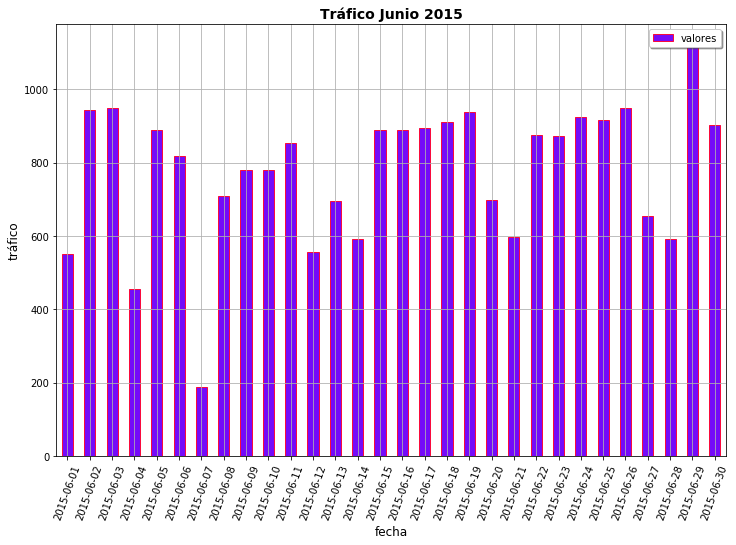

In [28]:
#Gráfica para mostrar el tráfico por días en Junio
df_junio.plot(kind='bar',color='#740bf9',edgecolor='#f90b3d',figsize=(12,6))
plt.title('Tráfico Junio 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Julio 2015

In [29]:
#Filtramos por Julio 2015
df_julio = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-07-01')&\
                      (df_datos_filtrados['fecha'] <= '2015-07-31')]\
                      .groupby(df_datos_filtrados['fecha'])\
                      .estado.mean().to_frame().reset_index()


#Añadimos valor faltante con el valor de la media de la columna estado en Julio de 2015
row_julio_1 = {'fecha':'2015-07-09', 'estado': df_julio.estado.mean()}
df_julio = df_julio.append(row_julio_1, ignore_index=True)

df_julio.sort_values(by=['fecha'],inplace=True)

df_julio.set_index('fecha',inplace=True)
df_julio.reset_index().head(5)

,fecha,estado
0,2015-07-01,864.078836
1,2015-07-02,729.075984
2,2015-07-03,706.745111
3,2015-07-04,804.766072
4,2015-07-05,1058.856615


In [30]:
#Máximo Valor Estado Julio 2015
df_julio[df_julio.estado == df_julio.estado.max()].reset_index()

,fecha,estado
0,2015-07-10,1251.974937


In [31]:
#Mínimo Valor Estado Julio 2015
df_julio[df_julio.estado == df_julio.estado.min()].reset_index()

,fecha,estado
0,2015-07-07,191.713568


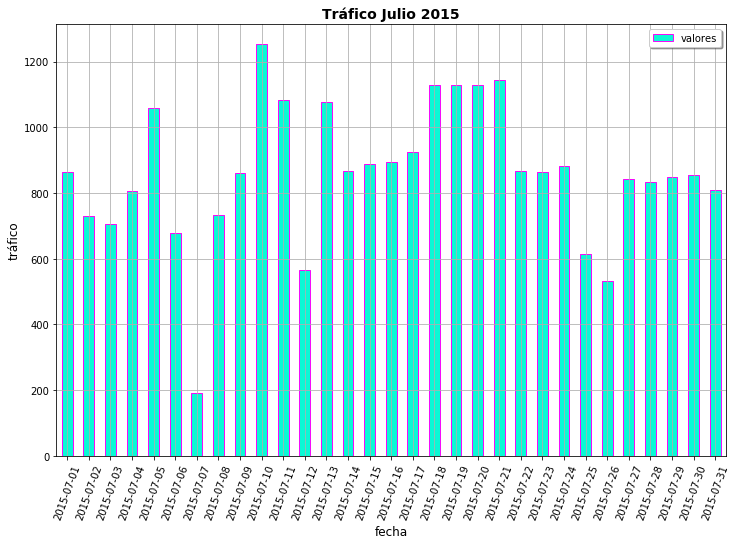

In [32]:
#Gráfica para mostrar el tráfico por días en Julio
df_julio.plot(kind='bar',color='#0bf9d5',edgecolor='#f50bf9',figsize=(12,6))
plt.title('Tráfico Julio 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Agosto 2015

In [33]:
#Filtramos por Agosto 2015
df_agosto = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-08-01')&\
                               (df_datos_filtrados['fecha'] <= '2015-08-31')]\
                                .groupby(df_datos_filtrados['fecha'])\
                                .estado.mean().to_frame().reset_index()

#Añadimos valor faltante con el valor de la media de la columna estado en Agosto de 2015
row_agosto_1 = {'fecha':'2015-08-23', 'estado': df_agosto.estado.mean()}
df_agosto = df_agosto.append(row_agosto_1, ignore_index=True)

df_agosto.sort_values(by=['fecha'],inplace=True)

df_agosto.set_index('fecha',inplace=True)
df_agosto.reset_index().head(5)

,fecha,estado
0,2015-08-01,857.862061
1,2015-08-02,562.744719
2,2015-08-03,587.305795
3,2015-08-04,807.373482
4,2015-08-05,940.040297


In [34]:
#Máximo Valor Estado Agosto 2015
df_agosto[df_agosto.estado == df_agosto.estado.max()].reset_index()

,fecha,estado
0,2015-08-31,996.517171


In [35]:
#Mínimo Valor Estado Agosto 2015
df_agosto[df_agosto.estado == df_agosto.estado.min()].reset_index()

,fecha,estado
0,2015-08-07,191.713568


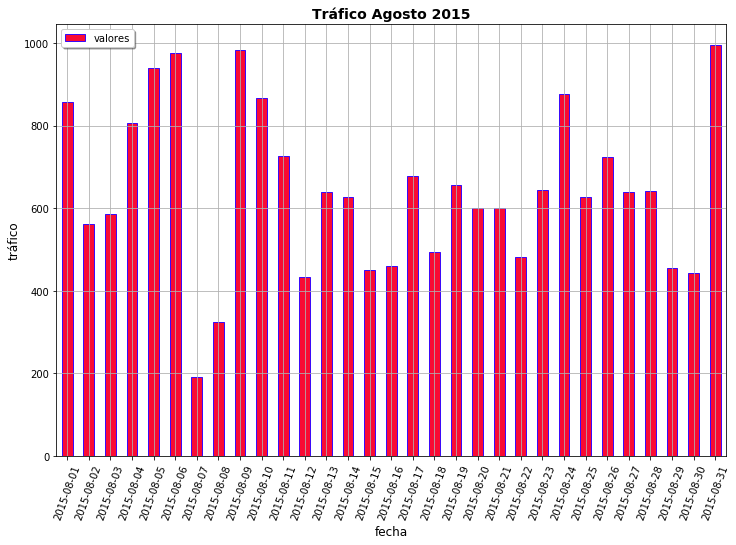

In [36]:
#Gráfica para mostrar el tráfico por días en Agosto
df_agosto.plot(kind='bar',color='#f90b33',edgecolor='#3a0bf9',figsize=(12,6))
plt.title('Tráfico Agosto 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper left",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Septiembre 2015

In [37]:
#Filtramos por Septiembre 2015
df_septiembre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-09-01')&\
                                   (df_datos_filtrados['fecha'] <= '2015-09-30')]\
                                   .groupby(df_datos_filtrados['fecha']).estado.mean().to_frame()

df_septiembre.reset_index().head(5)

,fecha,estado
0,2015-09-01,930.496998
1,2015-09-02,873.671769
2,2015-09-03,741.428433
3,2015-09-04,809.804102
4,2015-09-05,1128.044922


In [38]:
#Máximo Valor Estado Septiembre 2015
df_septiembre[df_septiembre.estado == df_septiembre.estado.max()].reset_index()

,fecha,estado
0,2015-09-29,1638.717109


In [39]:
#Mínimo Valor Estado Septiembre 2015
df_septiembre[df_septiembre.estado == df_septiembre.estado.min()].reset_index()

,fecha,estado
0,2015-09-07,207.896262


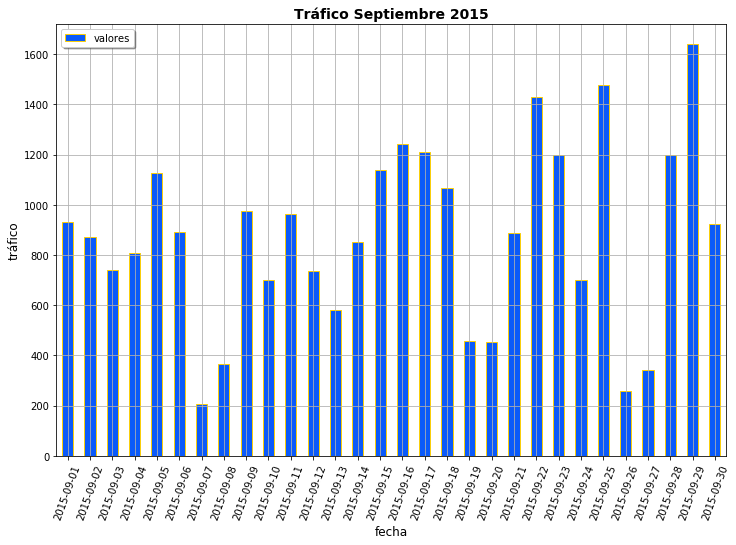

In [40]:
#Gráfica para mostrar el tráfico por días en Septiembre
df_septiembre.plot(kind='bar',color='#0b5af9',edgecolor='#f9ce0b',figsize=(12,6))
plt.title('Tráfico Septiembre 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper left",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Octubre 2015

In [41]:
#Filtramos por Ocutbre 2015
df_octubre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-10-01')&\
                                (df_datos_filtrados['fecha'] <= '2015-10-31')]\
                                .groupby(df_datos_filtrados['fecha']).estado.mean().to_frame()

df_octubre.reset_index().head(5)

,fecha,estado
0,2015-10-01,710.525082
1,2015-10-02,892.597189
2,2015-10-03,870.547189
3,2015-10-04,839.272934
4,2015-10-05,627.364622


In [42]:
#Máximo Valor Estado Octubre 2015
df_octubre[df_octubre.estado == df_octubre.estado.max()].reset_index()

,fecha,estado
0,2015-10-20,1317.342945


In [43]:
#Mínimo Valor Estado Octubre 2015
df_octubre[df_octubre.estado == df_octubre.estado.min()].reset_index()

,fecha,estado
0,2015-10-08,365.755556


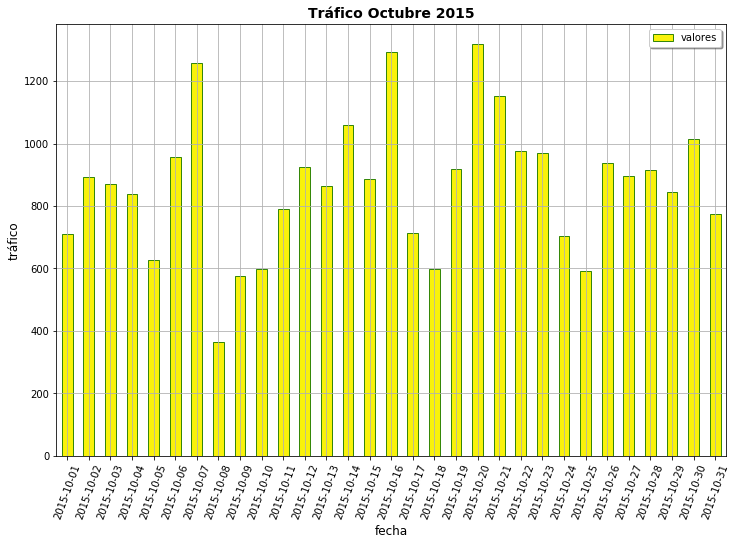

In [44]:
#Gráfica para mostrar el tráfico por días en Octubre
df_octubre.plot(kind='bar',color='#f9f20b',edgecolor='#358709',figsize=(12,6))
plt.title('Tráfico Octubre 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Noviembre 2015

In [45]:
#Filtramos por Noviembre 2015
df_noviembre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-11-01')&\
                                  (df_datos_filtrados['fecha'] <= '2015-11-30')]\
                                  .groupby(df_datos_filtrados['fecha']).estado.mean().to_frame()

df_noviembre.reset_index().head(5)

,fecha,estado
0,2015-11-01,587.398966
1,2015-11-02,894.856464
2,2015-11-03,879.392617
3,2015-11-04,610.410552
4,2015-11-05,1061.195737


In [46]:
#Máximo Valor Estado Noviembre 2015
df_noviembre[df_noviembre.estado == df_noviembre.estado.max()].reset_index()

,fecha,estado
0,2015-11-09,1453.500845


In [47]:
#Mínimo Valor Estado Noviembre 2015
df_noviembre[df_noviembre.estado == df_noviembre.estado.min()].reset_index()

,fecha,estado
0,2015-11-08,365.755556


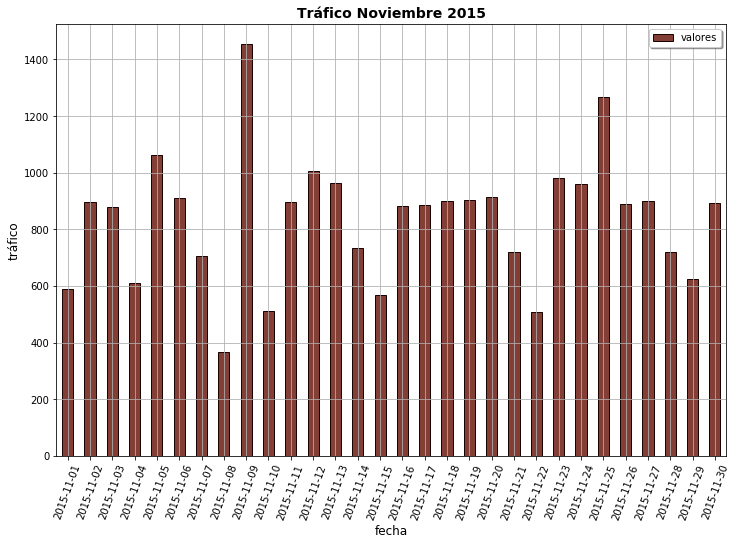

In [48]:
#Gráfica para mostrar el tráfico por días en Noviembre
df_noviembre.plot(kind='bar',color='#833e36',edgecolor='#1a0402',figsize=(12,6))
plt.title('Tráfico Noviembre 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Diciembre 2015

In [49]:
#Filtramos por Diciembre 2015
df_diciembre = df_datos_filtrados[(df_datos_filtrados['fecha'] >= '2015-12-01')&\
                                  (df_datos_filtrados['fecha'] <= '2015-12-31')]\
                                    .groupby(df_datos_filtrados['fecha']).estado.mean().to_frame()

df_diciembre.reset_index().head(5)

,fecha,estado
0,2015-12-01,868.120400
1,2015-12-02,940.375445
2,2015-12-03,903.610848
3,2015-12-04,477.565906
4,2015-12-05,880.204503


In [50]:
#Máximo Valor Estado Diciembre 2015
df_diciembre[df_diciembre.estado == df_diciembre.estado.max()].reset_index()

,fecha,estado
0,2015-12-23,1012.412104


In [51]:
#Mínimo Valor Estado Diciembre 2015
df_diciembre[df_diciembre.estado == df_diciembre.estado.min()].reset_index()

,fecha,estado
0,2015-12-04,477.565906


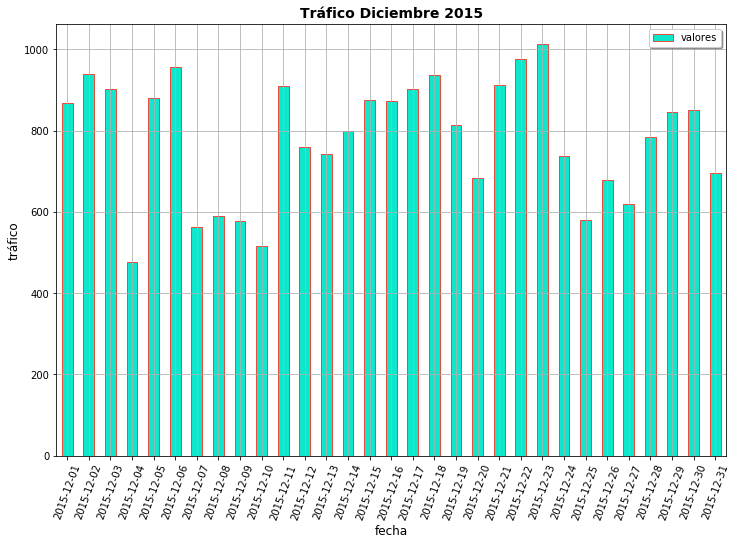

In [52]:
#Gráfica para mostrar el tráfico por días en Diciembre
df_diciembre.plot(kind='bar',color='#0fe7cd',edgecolor='#e74c3c',figsize=(12,6))
plt.title('Tráfico Diciembre 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('fecha',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

### Medias por Meses 2015

In [55]:
medias_meses = [] #lista vacía

#Pasamos los valores a la lista media_meses
medias_meses.append(df_enero.estado.mean())
medias_meses.append(df_febrero.estado.mean())
medias_meses.append(df_marzo.estado.mean())
medias_meses.append(df_abril.estado.mean())
medias_meses.append(df_mayo.estado.mean())
medias_meses.append(df_junio.estado.mean())
medias_meses.append(df_julio.estado.mean())
medias_meses.append(df_agosto.estado.mean())
medias_meses.append(df_septiembre.estado.mean())
medias_meses.append(df_octubre.estado.mean())
medias_meses.append(df_noviembre.estado.mean())
medias_meses.append(df_diciembre.estado.mean())

In [57]:
mes = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',\
       'Agosto','Septiembre','Octubre','Noviembre','Diciembre'] #añadimos los nombres de los meses
list_zip = list(zip(mes,medias_meses)) #juntamos las dos listas de nombres y medias
df_meses = pd.DataFrame(list_zip,columns = ['mes','media']) #pasamos los resultados a un dataframe
df_meses.set_index('mes',inplace=True)
df_meses.reset_index()

,mes,media
0,Enero,795.008835
1,Febrero,907.916959
2,Marzo,769.637529
3,Abril,862.182478
4,Mayo,820.688396
5,Junio,779.321996
6,Julio,859.761358
7,Agosto,645.030745
8,Septiembre,879.402118
9,Octubre,866.105368


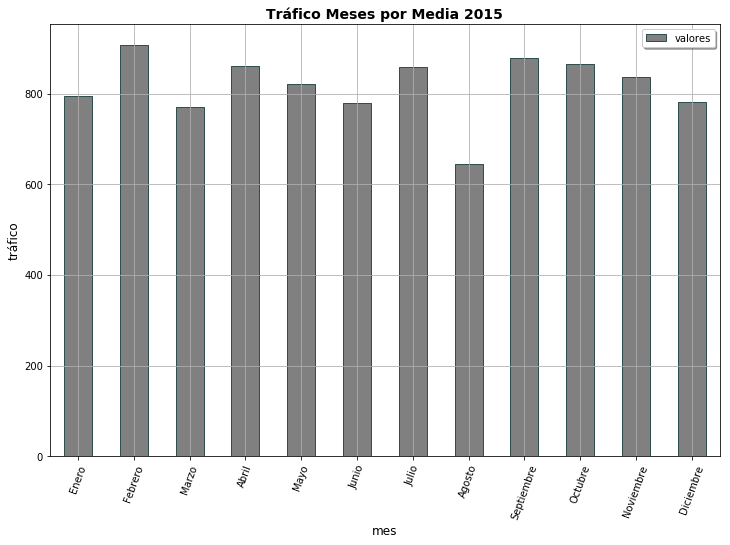

In [67]:
#Gráfica para mostrar el tráfico por media de meses en 2015
df_meses.plot(kind='bar',color='#808080',edgecolor='#2F4F4F',figsize=(12,6))
plt.title('Tráfico Meses por Media 2015',fontweight='bold',fontsize=14)
plt.legend(['valores'],loc="upper right",fontsize=10,shadow=True)
plt.xlabel('mes',fontsize=12)
plt.ylabel('tráfico',fontsize=12)
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=1, top=2)
plt.grid(True)
plt.show()

In [58]:
#Mes con menor media
min_value = df_meses['media'].min()
print('Agosto: ',round(min_value,2))

Agosto:  645.03


In [59]:
#Mes con mayor media
max_value = df_meses['media'].max()
print('Febrero: ',round(max_value,2))

Febrero:  907.92


In [62]:
#Media Anual
avg_meses = df_meses['media'].mean()
print('Media Anual: ',round(avg_meses,2))

Media Anual:  817.01


In [35]:
df_1 = df_enero.reset_index()
df_2 = df_febrero.reset_index()
df_3 = df_marzo.reset_index()
df_4 = df_abril.reset_index()
df_5 = df_mayo.reset_index()
df_6 = df_junio.reset_index()
df_7 = df_julio.reset_index()
df_8 = df_agosto.reset_index()
df_9 = df_septiembre.reset_index()
df_10 = df_octubre.reset_index()
df_11 = df_noviembre.reset_index()
df_12 = df_diciembre.reset_index()

In [39]:
list_frames = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12]
df_total_meses = pd.concat(list_frames,ignore_index=True)
df_total_meses

,fecha,estado
0,2015-01-01,493.433296
1,2015-01-02,583.876004
2,2015-01-03,613.272727
3,2015-01-04,937.628987
4,2015-01-05,555.306586
...,...,...
360,2015-12-27,618.328742
361,2015-12-28,784.022130
362,2015-12-29,845.548183
363,2015-12-30,850.371451
